### Assessment for Gen AI/Prompt Engineering Role
- Problem Statement 1: Natural Language Processing (NLP)
- Problem: Implement a function to preprocess and tokenize text data


### Need Libraries install

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
import pandas as pd

Load data

In [16]:
bbc_data = pd.read_csv("bbc_news.csv")

In [17]:
bbc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1000 non-null   int64 
 1   index        1000 non-null   int64 
 2   title        1000 non-null   object
 3   pubDate      1000 non-null   object
 4   guid         1000 non-null   object
 5   link         1000 non-null   object
 6   description  1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [18]:
titles = pd.DataFrame(bbc_data['title'])
titles.head()

,title
0,Can I refuse to work?
1,'Liz Truss the Brief?' World reacts to UK poli...
2,Rationing energy is nothing new for off-grid c...
3,The hunt for superyachts of sanctioned Russian...
4,Platinum Jubilee: 70 years of the Queen in 70 ...


### Clean data

In [19]:
# lowercase
titles['lowercase'] = titles['title'].str.lower()
titles.head()

,title,lowercase
0,Can I refuse to work?,can i refuse to work?
1,'Liz Truss the Brief?' World reacts to UK poli...,'liz truss the brief?' world reacts to uk poli...
2,Rationing energy is nothing new for off-grid c...,rationing energy is nothing new for off-grid c...
3,The hunt for superyachts of sanctioned Russian...,the hunt for superyachts of sanctioned russian...
4,Platinum Jubilee: 70 years of the Queen in 70 ...,platinum jubilee: 70 years of the queen in 70 ...


In [20]:
# stop word removal
en_stopwords = stopwords.words('english')
titles['no_stopwords'] = titles['lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))
titles.head()

,title,lowercase,no_stopwords
0,Can I refuse to work?,can i refuse to work?,refuse work?
1,'Liz Truss the Brief?' World reacts to UK poli...,'liz truss the brief?' world reacts to uk poli...,'liz truss brief?' world reacts uk political t...
2,Rationing energy is nothing new for off-grid c...,rationing energy is nothing new for off-grid c...,rationing energy nothing new off-grid community
3,The hunt for superyachts of sanctioned Russian...,the hunt for superyachts of sanctioned russian...,hunt superyachts sanctioned russian oligarchs
4,Platinum Jubilee: 70 years of the Queen in 70 ...,platinum jubilee: 70 years of the queen in 70 ...,platinum jubilee: 70 years queen 70 seconds


In [21]:
# punctation removal
titles['no_stopwords_no_punct'] = titles.apply(lambda x: re.sub(r"([^\w\s])", "", x['no_stopwords']), axis=1)
titles.head()

,title,lowercase,no_stopwords,no_stopwords_no_punct
0,Can I refuse to work?,can i refuse to work?,refuse work?,refuse work
1,'Liz Truss the Brief?' World reacts to UK poli...,'liz truss the brief?' world reacts to uk poli...,'liz truss brief?' world reacts uk political t...,liz truss brief world reacts uk political turmoil
2,Rationing energy is nothing new for off-grid c...,rationing energy is nothing new for off-grid c...,rationing energy nothing new off-grid community,rationing energy nothing new offgrid community
3,The hunt for superyachts of sanctioned Russian...,the hunt for superyachts of sanctioned russian...,hunt superyachts sanctioned russian oligarchs,hunt superyachts sanctioned russian oligarchs
4,Platinum Jubilee: 70 years of the Queen in 70 ...,platinum jubilee: 70 years of the queen in 70 ...,platinum jubilee: 70 years queen 70 seconds,platinum jubilee 70 years queen 70 seconds


In [24]:
import nltk
print(nltk.data.path)


['C:\\Users\\HOME/nltk_data', 'f:\\nutrition project\\.venv\\nltk_data', 'f:\\nutrition project\\.venv\\share\\nltk_data', 'f:\\nutrition project\\.venv\\lib\\nltk_data', 'C:\\Users\\HOME\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [ ]:
nltk.download('all')

In [28]:
# Tokenize
titles['tokens_raw'] = titles.apply(lambda x: word_tokenize(x['title']), axis=1)
titles['tokens_clean'] = titles.apply(lambda x: word_tokenize(x['no_stopwords_no_punct']), axis=1)
titles.head()


,title,lowercase,no_stopwords,no_stopwords_no_punct,tokens_raw,tokens_clean
0,Can I refuse to work?,can i refuse to work?,refuse work?,refuse work,"[Can, I, refuse, to, work, ?]","[refuse, work]"
1,'Liz Truss the Brief?' World reacts to UK poli...,'liz truss the brief?' world reacts to uk poli...,'liz truss brief?' world reacts uk political t...,liz truss brief world reacts uk political turmoil,"['Liz, Truss, the, Brief, ?, ', World, reacts,...","[liz, truss, brief, world, reacts, uk, politic..."
2,Rationing energy is nothing new for off-grid c...,rationing energy is nothing new for off-grid c...,rationing energy nothing new off-grid community,rationing energy nothing new offgrid community,"[Rationing, energy, is, nothing, new, for, off...","[rationing, energy, nothing, new, offgrid, com..."
3,The hunt for superyachts of sanctioned Russian...,the hunt for superyachts of sanctioned russian...,hunt superyachts sanctioned russian oligarchs,hunt superyachts sanctioned russian oligarchs,"[The, hunt, for, superyachts, of, sanctioned, ...","[hunt, superyachts, sanctioned, russian, oliga..."
4,Platinum Jubilee: 70 years of the Queen in 70 ...,platinum jubilee: 70 years of the queen in 70 ...,platinum jubilee: 70 years queen 70 seconds,platinum jubilee 70 years queen 70 seconds,"[Platinum, Jubilee, :, 70, years, of, the, Que...","[platinum, jubilee, 70, years, queen, 70, seco..."


In [29]:
# lemmatizing 
lemmatizer = WordNetLemmatizer()
titles["tokens_clean_lemmatized"] = titles["tokens_clean"].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
titles.head()

,title,lowercase,no_stopwords,no_stopwords_no_punct,tokens_raw,tokens_clean,tokens_clean_lemmatized
0,Can I refuse to work?,can i refuse to work?,refuse work?,refuse work,"[Can, I, refuse, to, work, ?]","[refuse, work]","[refuse, work]"
1,'Liz Truss the Brief?' World reacts to UK poli...,'liz truss the brief?' world reacts to uk poli...,'liz truss brief?' world reacts uk political t...,liz truss brief world reacts uk political turmoil,"['Liz, Truss, the, Brief, ?, ', World, reacts,...","[liz, truss, brief, world, reacts, uk, politic...","[liz, truss, brief, world, reacts, uk, politic..."
2,Rationing energy is nothing new for off-grid c...,rationing energy is nothing new for off-grid c...,rationing energy nothing new off-grid community,rationing energy nothing new offgrid community,"[Rationing, energy, is, nothing, new, for, off...","[rationing, energy, nothing, new, offgrid, com...","[rationing, energy, nothing, new, offgrid, com..."
3,The hunt for superyachts of sanctioned Russian...,the hunt for superyachts of sanctioned russian...,hunt superyachts sanctioned russian oligarchs,hunt superyachts sanctioned russian oligarchs,"[The, hunt, for, superyachts, of, sanctioned, ...","[hunt, superyachts, sanctioned, russian, oliga...","[hunt, superyachts, sanctioned, russian, oliga..."
4,Platinum Jubilee: 70 years of the Queen in 70 ...,platinum jubilee: 70 years of the queen in 70 ...,platinum jubilee: 70 years queen 70 seconds,platinum jubilee 70 years queen 70 seconds,"[Platinum, Jubilee, :, 70, years, of, the, Que...","[platinum, jubilee, 70, years, queen, 70, seco...","[platinum, jubilee, 70, year, queen, 70, second]"


In [30]:
# create lists for just our tokens
tokens_raw_list = sum(titles['tokens_raw'], []) #unpack our lists into a single list
tokens_clean_list = sum(titles['tokens_clean_lemmatized'], [])

POS Tagging

In [32]:
nlp = spacy.load('en_core_web_sm')

In [35]:
# create a spacy doc from our raw text - better for pos tagging
spacy_doc = nlp(' '.join(tokens_raw_list))
spacy_doc

Can I refuse to work ? 'Liz Truss the Brief ? ' World reacts to UK political turmoil Rationing energy is nothing new for off-grid community The hunt for superyachts of sanctioned Russian oligarchs Platinum Jubilee : 70 years of the Queen in 70 seconds Red Bull found guilty of breaking Formula 1 's budget cap World Triathlon Championship Series : Flora Duffy beats Georgia Taylor-Brown to women 's title Terry Hall : Coventry scooter ride-out pays tribute to singer Post Office and Fujitsu to face inquiry over Horizon scandal 'Pavement parking frightens me ' UK interest rates : How will the rise affect you and how high could it go ? They stayed for the storm - what happens now ? Six Nations : Can Scotland 's best since '99 beat best Ireland ever ? How long can Liz Truss survive as prime minister ? Platinum Jubilee : Beacons light across the globe to celebrate Queen 's reign Top student loan interest rate cut by 5 % in England Russians said they ’ d take my baby : A medic ’ s story Week in 

In [36]:
# Initialize an empty list to collect the rows
pos_data = []

# Iterate over the tokens in the spacy_doc
for token in spacy_doc:
    pos_data.append({'token': token.text, 'pos_tag': token.pos_})

# Convert the list of dictionaries into a DataFrame
pos_df = pd.DataFrame(pos_data)

In [37]:
# token frequency count
pos_df_counts = pos_df.groupby(['token','pos_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
pos_df_counts.head(10)

,token,pos_tag,counts
94,:,PUNCT,543
7,',PUNCT,315
2895,in,ADP,187
4072,to,PART,173
3262,of,ADP,172
21,-,PUNCT,165
4033,the,DET,163
1858,and,CCONJ,147
14,'s,PART,142
96,?,PUNCT,130


In [38]:
# most common nouns
nouns = pos_df_counts[pos_df_counts.pos_tag == "NOUN"][0:10]
nouns

,token,pos_tag,counts
4258,war,NOUN,35
3545,record,NOUN,15
4350,year,NOUN,14
3999,tax,NOUN,13
3411,police,NOUN,13
3362,people,NOUN,12
2323,day,NOUN,12
4307,win,NOUN,11
2029,boss,NOUN,11
2565,fans,NOUN,11


In [39]:
# most common verbs
verbs = pos_df_counts[pos_df_counts.pos_tag == "VERB"][0:10]
verbs

,token,pos_tag,counts
3678,says,VERB,30
4308,win,VERB,15
2666,found,VERB,13
1963,beats,VERB,9
4317,wins,VERB,9
2708,get,VERB,9
2383,dies,VERB,9
8,',VERB,9
3677,say,VERB,8
2792,have,VERB,8


In [40]:
# most common adjectives
adj = pos_df_counts[pos_df_counts.pos_tag == "ADJ"][0:10]
adj

,token,pos_tag,counts
3239,new,ADJ,28
1399,Russian,ADJ,22
2602,final,ADJ,16
18,-,ADJ,14
2621,first,ADJ,13
3195,more,ADJ,10
2832,high,ADJ,10
2998,last,ADJ,9
1992,big,ADJ,9
3298,other,ADJ,8


TASK-2
-- Create a basic text generation model using a pre-trained transformer

### Load the Pre-trained Model and Tokenizer

In [63]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load pre-trained model and tokenizer
model_name = "TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

### Model and Tokenizer: 

Use AutoModelForCausalLM and AutoTokenizer to handle the 
"TinyLlama/TinyLlama-1.-1B-intermediate-step-1431k-3T" model, which is appropriate for causal language modeling tasks.

### Tokenization and Generation: 
The tokenizer converts the prompt into tokens, which are then processed by the model to generate text. Adjust max_length, num_return_sequences, no_repeat_ngram_size, and early_stopping parameters to refine the output.

In [67]:
# Define a prompt
prompt =  input("Enter a prompt for text generation: ")

# Tokenize the input prompt
inputs = tokenizer(prompt, return_tensors="pt")

# Generate text
outputs = model.generate(
    inputs["input_ids"],
    max_length=100,         # Maximum length of the generated text
    num_return_sequences=1, # Number of sequences to return
    no_repeat_ngram_size=2, # Avoid repeating n-grams
    early_stopping=True     # Stop when end of sequence token is generated
)

# Decode the generated text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)



Once upon a time in a land far, far away, there lived a young man named Jack. Jack was a very good boy, but he was also a bit of a nerd. He was very interested in science and math, and he loved to read. One day, Jack went to the library to check out a book. The librarian asked Jack if he wanted to borrow a certain book, which was called "The Hobbit." Jack said yes, so the li...



TASK 3

-- Design and evaluate prompts to improve the performance of a given AI model on a specific task (e.g., summarization, question answering).

In [24]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

In [25]:
# Load model and tokenizer
model_name = "gpt2"  # Example model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

In [26]:
# Define improved prompts
prompts = [
     "Write a captivating story about Jack, a brave hero who sets out on a quest to find a legendary treasure with immense magical powers. Include detailed descriptions of the mystical land, the formidable challenges Jack encounters, the unique magical creatures he meets, and how these experiences contribute to his personal growth."
    
]

# Define reference texts for evaluation
references = [
    "Jack, a young hero, embarks on a perilous journey to discover a legendary treasure with magical powers. He encounters mythical creatures and faces numerous challenges that test his bravery and skills. Throughout his journey, Jack grows as a hero and learns valuable lessons that shape his destiny."
]

In [27]:
# Initialize smoothing function for BLEU scoring
smoothing = SmoothingFunction().method1

# Initialize ROUGE scorer
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

In [28]:
# Generate and evaluate text
for prompt, reference in zip(prompts, references):
    # Tokenize and generate text
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(
        inputs["input_ids"],
        max_length=150,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        temperature=0.7,
        top_k=50,
        top_p=0.85,
        early_stopping=True
    )
    
    # Decode generated text
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [29]:
 # Tokenize for BLEU scoring
reference_tokens = reference.split()
generated_tokens = generated_text.split()

# Compute BLEU score
bleu_score = sentence_bleu([reference_tokens], generated_tokens, smoothing_function=smoothing)

# Compute ROUGE scores
rouge_scores = rouge_scorer.score(reference, generated_text)

print(f"Prompt: {prompt}")
print(f"Generated Text: {generated_text}")
print(f"BLEU Score: {bleu_score}")
print(f"ROUGE Scores: {rouge_scores}\n")

Prompt: Write a captivating story about Jack, a brave hero who sets out on a quest to find a legendary treasure with immense magical powers. Include detailed descriptions of the mystical land, the formidable challenges Jack encounters, the unique magical creatures he meets, and how these experiences contribute to his personal growth.
Generated Text: Write a captivating story about Jack, a brave hero who sets out on a quest to find a legendary treasure with immense magical powers. Include detailed descriptions of the mystical land, the formidable challenges Jack encounters, the unique magical creatures he meets, and how these experiences contribute to his personal growth.

The story is set in the year 2032, when the world is in a state of war between the kingdoms of New York and the Empire of Japan. The war is fought between two factions of powerful, powerful people, led by a mysterious figure known as the "King of Kings." The King of King is a powerful sorcerer known for his ability to

### Scores:

-BLEU Score: 0.0309

ROUGE Scores:

-ROUGE-1: Precision=0.182, Recall=0.511, F-measure=0.268
-ROUGE-2: Precision=0.046, Recall=0.130, F-measure=0.068
-ROUGE-L: Precision=0.152, Recall=0.426, F-measure=0.223

### Analysis:
- BLEU Score (0.0309):

The BLEU score is quite low, indicating that there are few exact matches between the generated text and the reference text. This suggests that the content is somewhat aligned with the prompt but lacks sufficient overlap with the expected narrative.
ROUGE Scores:

-ROUGE-1: The precision and recall values are better compared to the previous results, indicating some overlap in single words or short phrases.
-ROUGE-2: The low precision and recall reflect limited overlap in bigrams, suggesting that the generated text may not capture the nuances of the reference narrative.
-ROUGE-L: Improved precision and recall indicate better alignment in the sequence of words, but there’s still room for improvement in capturing the overall narrative structure.

In [33]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

def generate_and_evaluate(prompt, reference):
    # Load model and tokenizer
    model_name = "gpt2"  # Example model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)

    # Initialize smoothing function for BLEU scoring
    smoothing = SmoothingFunction().method1

    # Initialize ROUGE scorer
    rouge_scorer_instance = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Tokenize and generate text
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(
        inputs["input_ids"],
        max_length=300,       # Adjusted length for detailed text
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        temperature=0.7,      # Adjusted temperature
        top_k=50,            # Adjusted top-K sampling
        top_p=0.85,          # Adjusted top-P sampling
        early_stopping=True
    )
    
    # Decode generated text
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    # Tokenize for BLEU scoring
    reference_tokens = reference.split()
    generated_tokens = generated_text.split()
    
    # Compute BLEU score
    bleu_score = sentence_bleu([reference_tokens], generated_tokens, smoothing_function=smoothing)
    
    # Compute ROUGE scores
    rouge_scores = rouge_scorer_instance.score(reference, generated_text)
    
    # Print results
    print(f"Prompt: {prompt}")
    print(f"Generated Text: {generated_text}")
    print(f"BLEU Score: {bleu_score:.4f}")
    print(f"ROUGE Scores: {rouge_scores}\n")

# Define different prompts and their corresponding references
prompts_and_references = [
    {
        "prompt": "Write a compelling and detailed narrative about a hero named Jack who embarks on an epic journey to discover a legendary treasure with immense magical powers. Include vivid descriptions of the challenges faced, the magical creatures encountered, and Jack's personal growth.",
        "reference": "Jack, a courageous hero, embarks on a perilous quest to find a legendary treasure with magical powers. He explores a mystical land filled with magical creatures and faces numerous formidable challenges. Through his journey, Jack grows as a hero, learning valuable lessons and discovering his own strengths and weaknesses."
    },
    {
        "prompt": "Create an engaging narrative about a hero's epic journey to find a legendary treasure with immense powers.",
        "reference": "In a mystical land, a hero discovered magical creatures and ancient artifacts that shaped their destiny."
    },
    {
        "prompt": "Describe an ancient civilization with advanced technology and unique traditions.",
        "reference": "The ancient civilization was renowned for its advanced technology and magical traditions that influenced its history."
    },
    {
        "prompt": "Write a detailed story about a magical land with mythical creatures.",
        "reference": "The land was filled with mythical creatures and ancient magic that wove through the landscape, creating a world of wonder and mystery."
    }
]

# Evaluate each prompt
for item in prompts_and_references:
    generate_and_evaluate(item["prompt"], item["reference"])


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: Write a compelling and detailed narrative about a hero named Jack who embarks on an epic journey to discover a legendary treasure with immense magical powers. Include vivid descriptions of the challenges faced, the magical creatures encountered, and Jack's personal growth.
Generated Text: Write a compelling and detailed narrative about a hero named Jack who embarks on an epic journey to discover a legendary treasure with immense magical powers. Include vivid descriptions of the challenges faced, the magical creatures encountered, and Jack's personal growth.

The book will be available in paperback and digital formats starting in January.
BLEU Score: 0.0720
ROUGE Scores: {'rouge1': Score(precision=0.41818181818181815, recall=0.46938775510204084, fmeasure=0.4423076923076923), 'rouge2': Score(precision=0.12962962962962962, recall=0.14583333333333334, fmeasure=0.13725490196078433), 'rougeL': Score(precision=0.2909090909090909, recall=0.32653061224489793, fmeasure=0.3076923076923076

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: Create an engaging narrative about a hero's epic journey to find a legendary treasure with immense powers.
Generated Text: Create an engaging narrative about a hero's epic journey to find a legendary treasure with immense powers.

The story begins with a young boy named Jack, who is a member of the Royal Guard. He is sent to the Isle of Wight to investigate a mysterious artifact. The boy is told that he must find the treasure and must fight against the evil forces that have taken over the world. Jack is given a chance to join the royal guard and fight for his country. But when he is attacked by a group of evil spirits, he finds himself in a strange land where he has to fight to save his family. Written by Anonymous
BLEU Score: 0.0022
ROUGE Scores: {'rouge1': Score(precision=0.06896551724137931, recall=0.5, fmeasure=0.1212121212121212), 'rouge2': Score(precision=0.017391304347826087, recall=0.13333333333333333, fmeasure=0.030769230769230767), 'rougeL': Score(precision=0.03448275

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: Describe an ancient civilization with advanced technology and unique traditions.
Generated Text: Describe an ancient civilization with advanced technology and unique traditions.

The Ancient Egyptians were a people of the Nile Valley, a region of Egypt that was home to the largest population of people in the world. The Nile valley was the source of many of today's major cities, including Cairo, Alexandria, and Alexandria-Macedonian. It was also home of a large number of ancient civilizations, such as the Egyptians, the Persians, Egyptians of Asia Minor, Greeks, Romans, Perses, Babylonians and the Romans. Ancient Egypt was a major center of civilization for the ancient Egyptians. In the early Middle Ages, Egypt became a center for trade and commerce. Egypt's trade routes were extensive, with many cities and towns in Egypt. Many of these trade networks were connected by the river Nile. During the Middle Kingdom, trade was not limited to Egypt, but also included the Mediterranean,

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: Write a detailed story about a magical land with mythical creatures.
Generated Text: Write a detailed story about a magical land with mythical creatures.

The story is about the story of a young girl who is a princess of the land of Erebor. She is the daughter of an ancient king and a noblewoman. The story begins with her being taken to the castle of Gondor, where she is taught the secrets of magic. When she learns of her father's death, she becomes a witch and becomes the queen of that land. Her father is killed by a dragon and she must find her way back to Eor. But when she meets a man named Gollum, who has been banished from Eorebor, the kingdom of Mournhold, and is now ruled by the king of Dorne, her journey is interrupted by an evil wizard named Eirika. Eireann is ruled as a kingdom by Eru, a powerful wizard who was once a member of King Erythra's court. In the end, Eurydice is taken over by Gorgon, an old man who had been exiled from the realm of Nerevar. Gog is sent to N

### BLEU Scores:
-Prompt 1:

Score: 0.0720
-Analysis: This prompt generated a text that provided a brief summary and did not fully capture the requested detailed narrative. The BLEU score indicates limited overlap with the reference text.
-Prompt 2:

Score: 0.0022
-Analysis: The generated text was largely irrelevant to the prompt and the reference. The low BLEU score reflects this mismatch, with minimal n-gram overlap.
Prompt 3:

Score: 0.0055
-Analysis: The generated text diverged significantly from the expected content and detailed descriptions. The low BLEU score suggests a lack of coherence with the reference.
-Prompt 4:

Score: 0.0026
-Analysis: The generated text was not aligned with the prompt and contained irrelevant content. The BLEU score indicates poor alignment with the reference text.
ROUGE Scores:

-Prompt 1:

-ROUGE-1: Precision=0.418, Recall=0.469, F-measure=0.442
-ROUGE-2: Precision=0.1296, Recall=0.1458, F-measure=0.1373
-ROUGE-L: Precision=0.291, Recall=0.327, F-measure=0.308
-Analysis: The ROUGE-1 scores indicate a moderate level of overlap with the reference. ROUGE-2 scores are lower, reflecting less overlap on the n-gram level, while ROUGE-L shows better recall, indicating some coherence in capturing longer sequences.

-Prompt 2:

-ROUGE-1: Precision=0.048, Recall=0.75, F-measure=0.091
-ROUGE-2: Precision=0.0161, Recall=0.267, F-measure=0.0304
-ROUGE-L: Precision=0.032, Recall=0.5, F-measure=0.0604
-Analysis: The ROUGE scores are low, reflecting poor overlap with the reference. The recall is higher, indicating that some parts of the reference were captured, but precision is low.

-Prompt 3:

-ROUGE-1: Precision=0.061, Recall=0.636, F-measure=0.111
-ROUGE-2: Precision=0.0131, Recall=0.143, F-measure=0.024
-ROUGE-L: Precision=0.048, Recall=0.5, F-measure=0.087
-Analysis: The ROUGE-1 score shows some alignment with the reference, but the overall F-measure is low, indicating that while some content was captured, it did not match well in terms of detail and coherence.

-Prompt 4:

-ROUGE-1: Precision=0.061, Recall=0.636, F-measure=0.111
-ROUGE-2: Precision=0.0131, Recall=0.143, F-measure=0.024
-ROUGE-L: Precision=0.048, Recall=0.5, F-measure=0.087
-Analysis: The ROUGE scores are similar to Prompt 3, with a low F-measure indicating minimal coherence with the reference text. Precision and recall are balanced but low.

In [1]:
from sklearn.metrics import f1_score

# Hypothetical predictions and true answers
true_answers = ["land"]
predicted_answers = ["sea"]

# Compute F1 score
f1 = f1_score(true_answers, predicted_answers, average='micro')

print(f"F1 Score: {f1}")


F1 Score: 0.0


### TASK 4
-- Data Analysis

In [34]:
import pandas as pd

In [35]:
data=pd.read_csv(r"F:\nutrition project\classification_data.csv")
data

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01
99996,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01
99997,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01
99998,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [37]:
data.isna().sum()

count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
latest_visit_id           0
visitId_threshold         0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword    

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

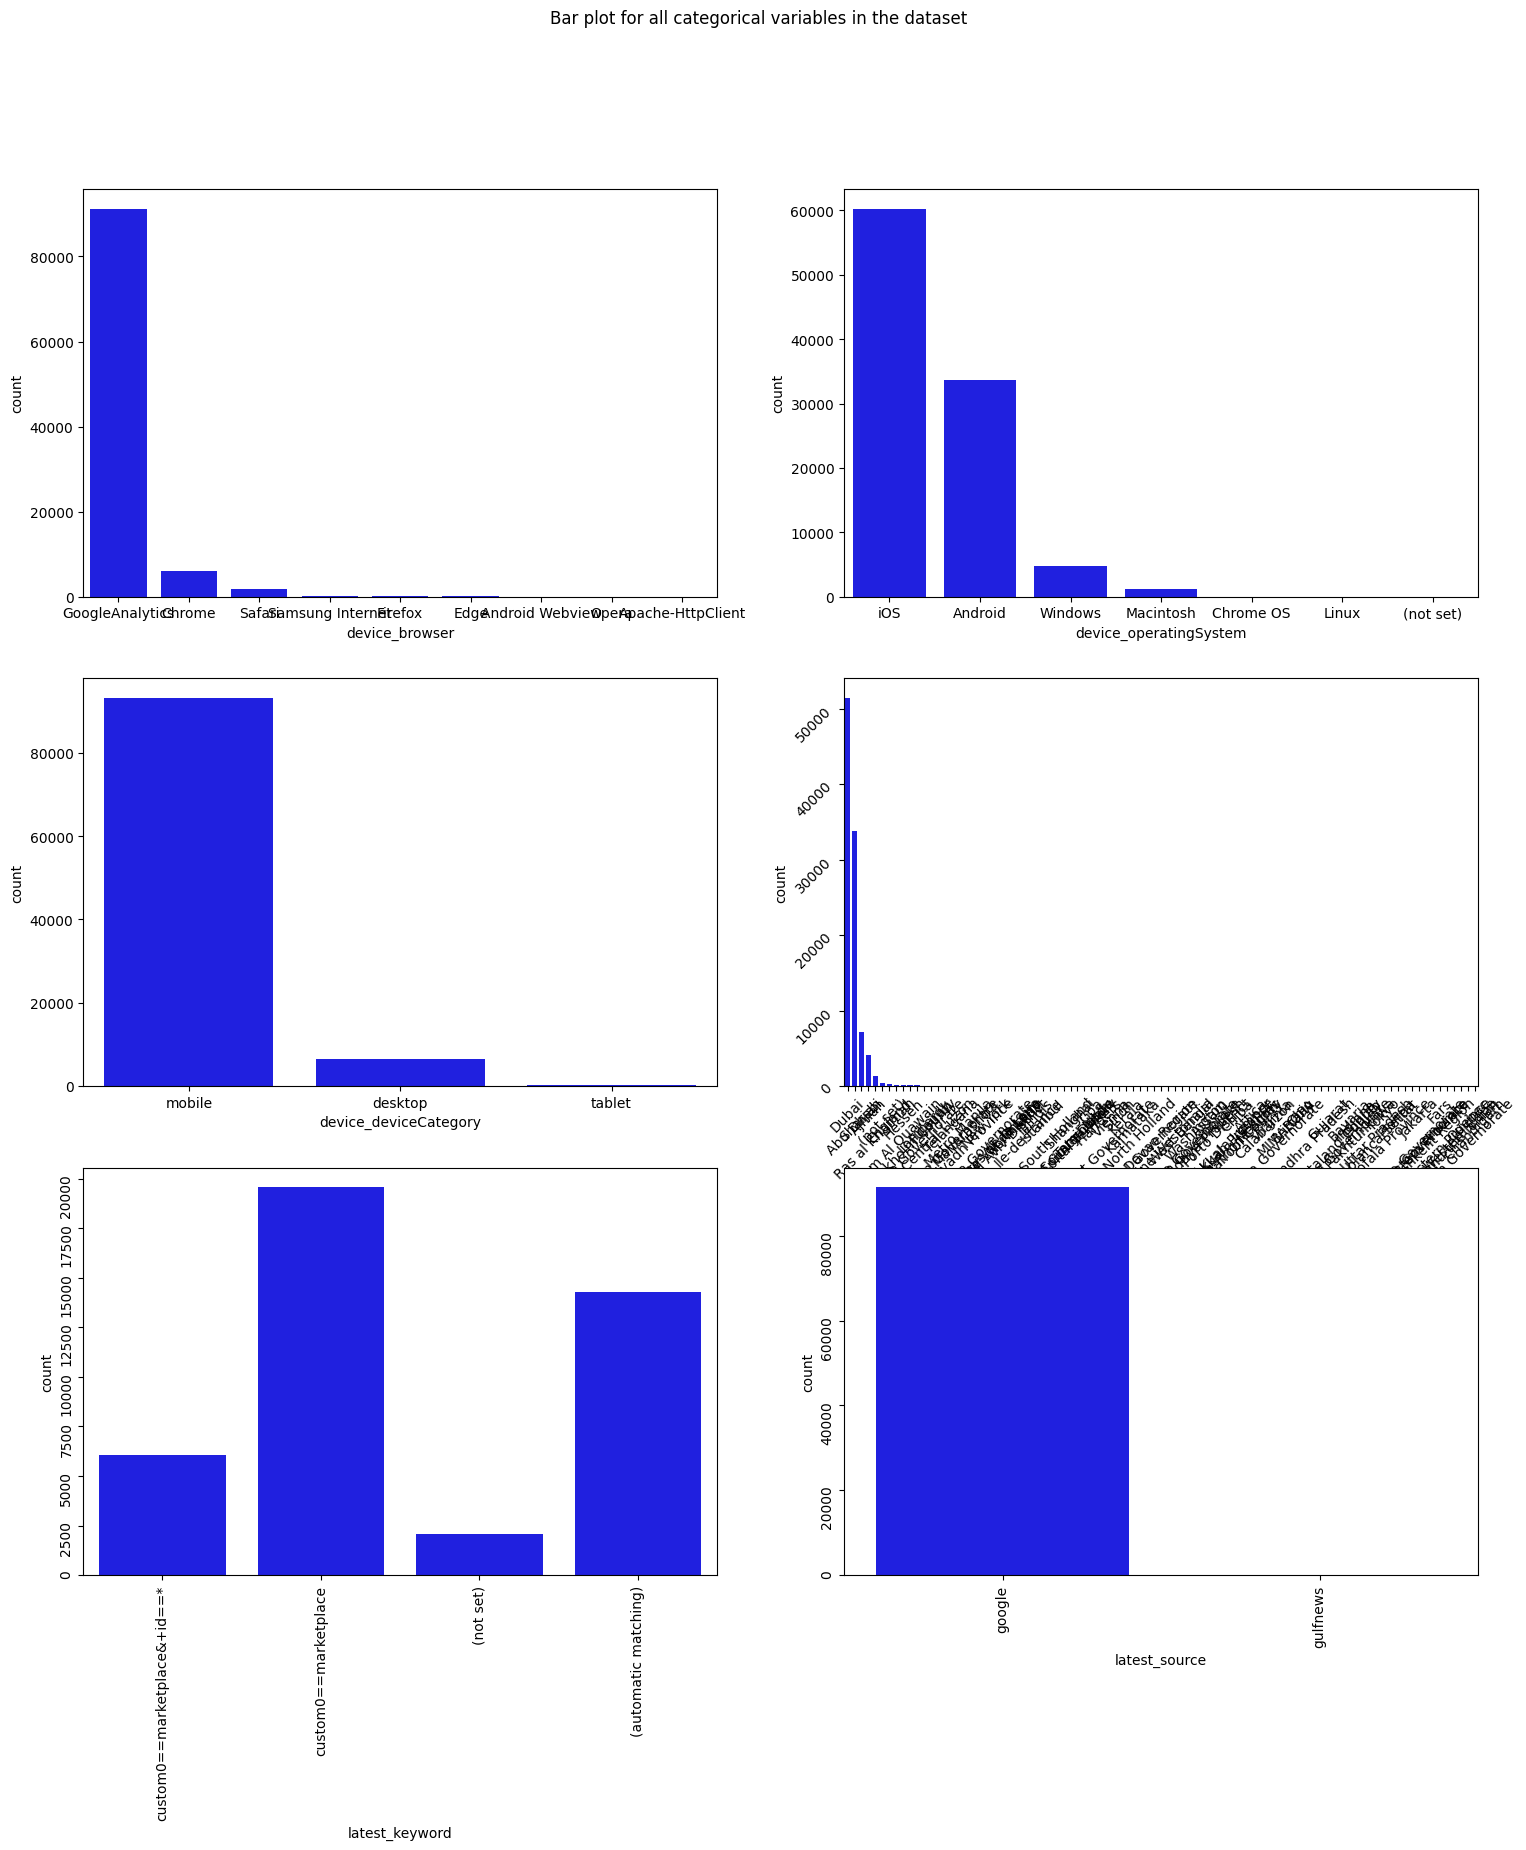

In [40]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'device_browser', data = data, color = 'blue', 
              order = data['device_browser'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'device_operatingSystem', data = data, color = 'blue', 
              order = data['device_operatingSystem'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'device_deviceCategory', data = data, color = 'blue', 
              order = data['device_deviceCategory'].value_counts().index);
sns.countplot(ax = axes[1, 1], x =  'geoNetwork_region', data = data, color = 'blue', 
              order = data[ 'geoNetwork_region'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'latest_keyword', data = data, color = 'blue', 
              order = data['latest_keyword'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x =  'latest_source', data = data, color = 'blue', 
              order = data[ 'latest_source'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [41]:
data_cat=data.select_dtypes(object)

In [42]:
data_num=data.select_dtypes(["int64","float64"])

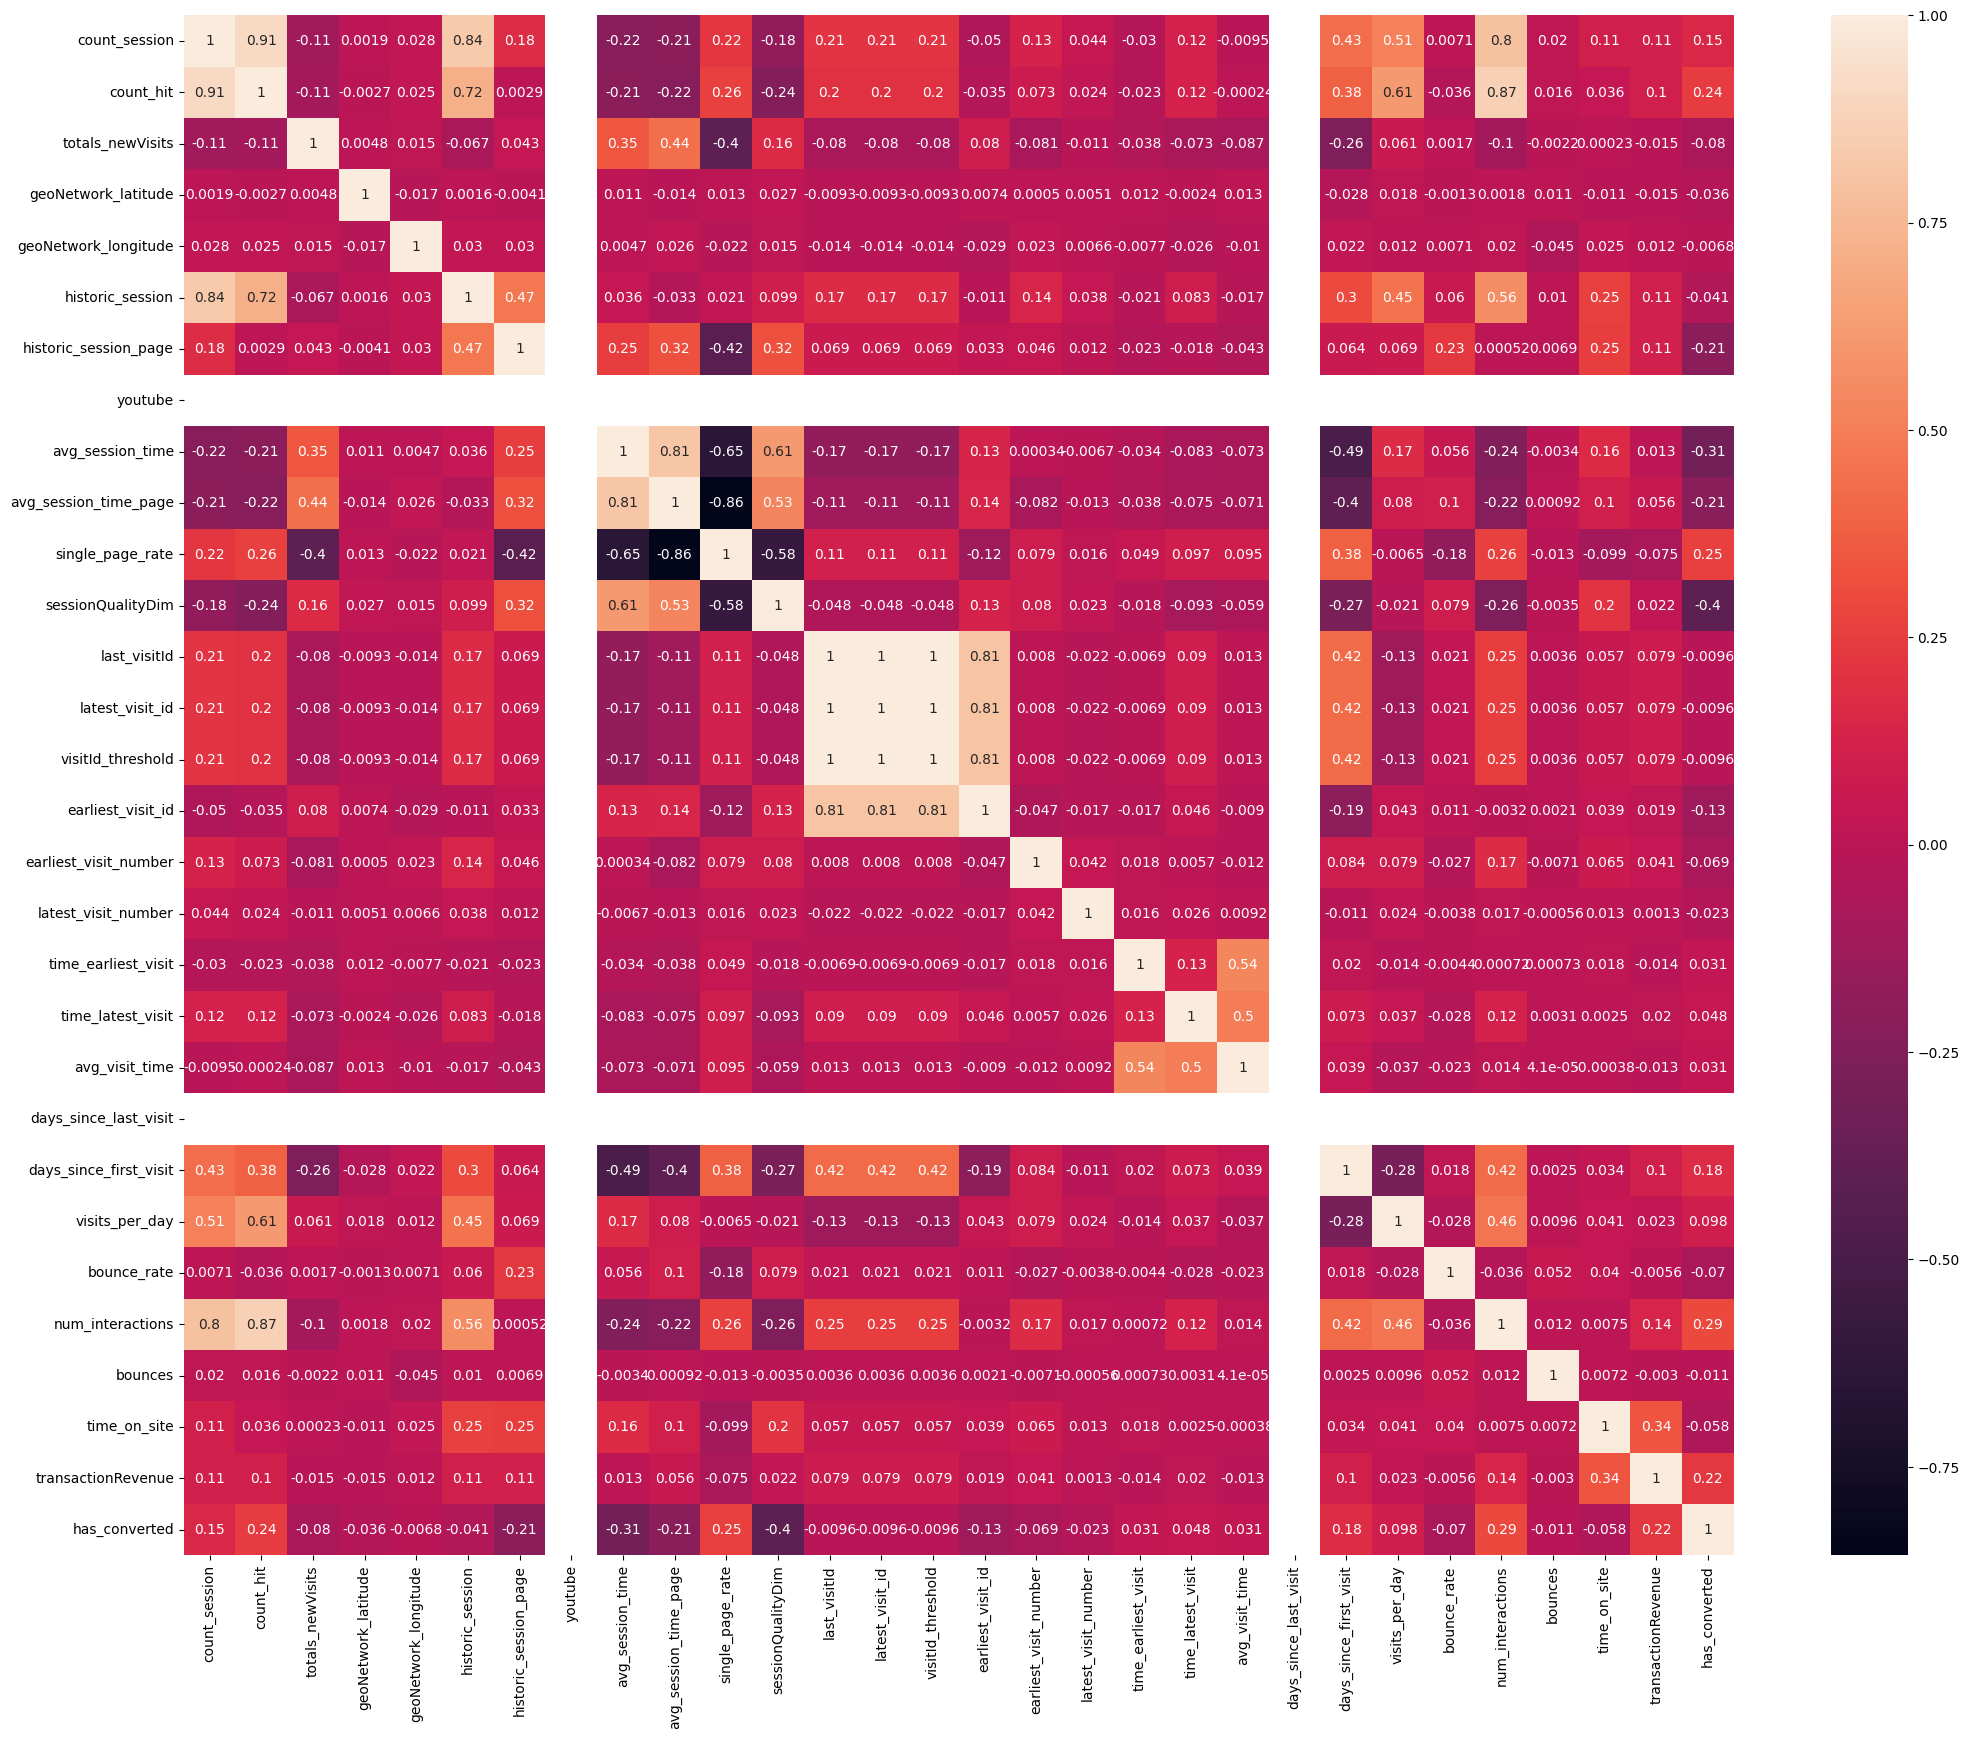

In [43]:
plt.figure(figsize = (25,20))
sns.heatmap(data_num.corr(),annot=True)
plt.show()

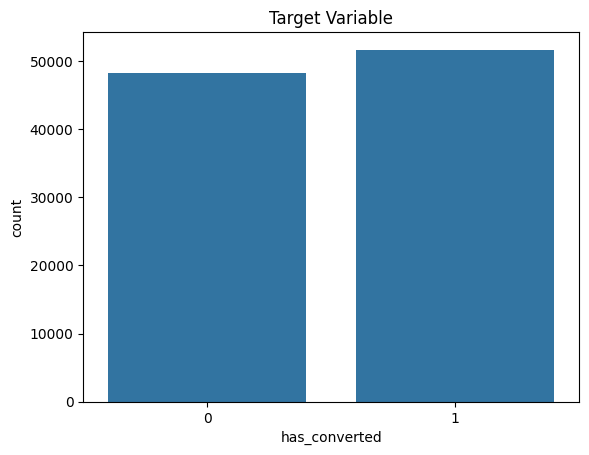

In [44]:
sns.countplot(x="has_converted", data=data)
plt.title("Target Variable")
plt.show()

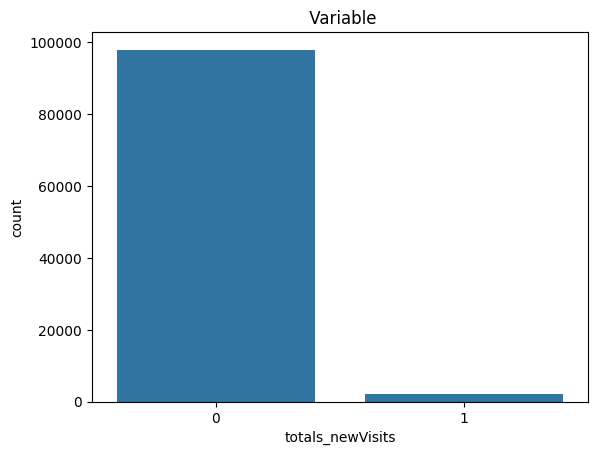

In [45]:
sns.countplot(x="totals_newVisits", data=data)
plt.title(" Variable")
plt.show()

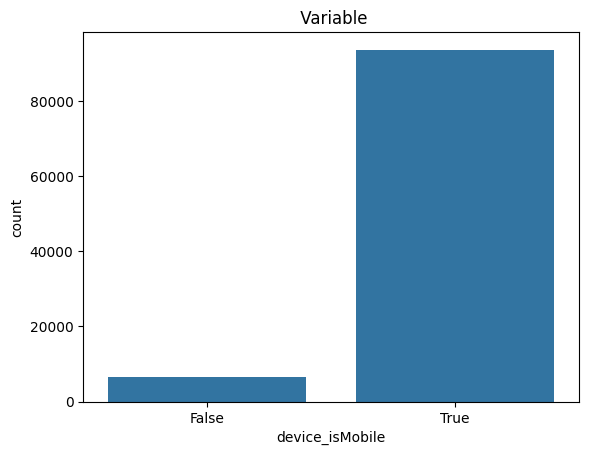

In [46]:
sns.countplot(x="device_isMobile", data=data)
plt.title(" Variable")
plt.show()

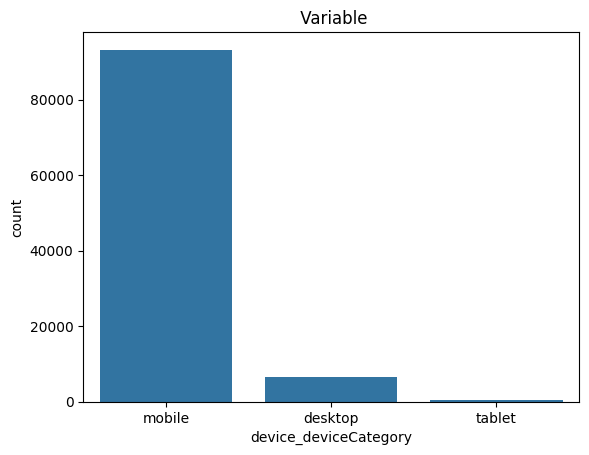

In [47]:
sns.countplot(x="device_deviceCategory", data=data)
plt.title(" Variable")
plt.show()

<Axes: xlabel='device_deviceCategory', ylabel='count'>

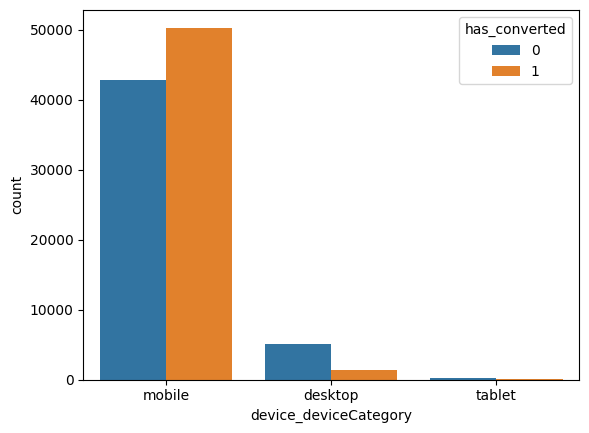

In [48]:
#visualize the has converted count for both device_deviceCategory
sns.countplot(x="device_deviceCategory", hue="has_converted",data=data)

C:\Users\HOME\AppData\Local\Temp\ipykernel_3604\723641417.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='device_deviceCategory', y='has_converted', ci=None, palette='muted')
C:\Users\HOME\AppData\Local\Temp\ipykernel_3604\723641417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='device_deviceCategory', y='has_converted', ci=None, palette='muted')


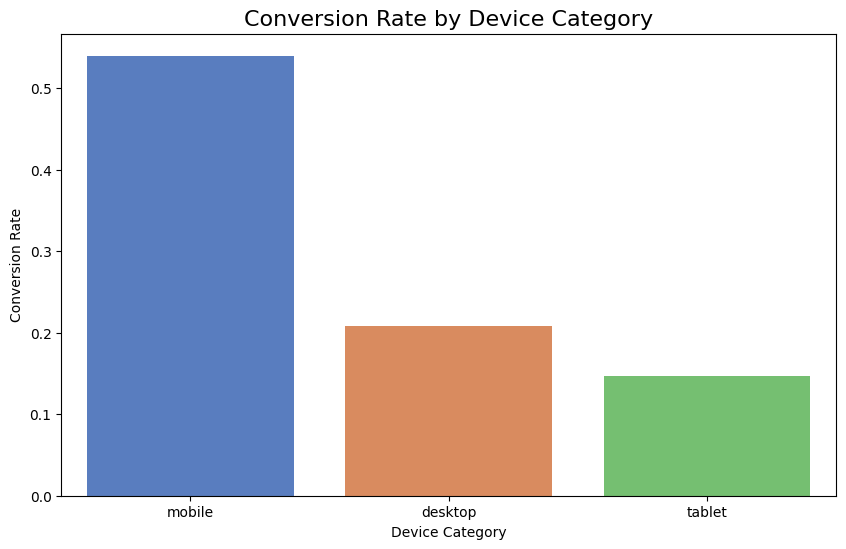

In [50]:
# Plot 2: Conversion rate by device category
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='device_deviceCategory', y='has_converted', ci=None, palette='muted')
plt.title('Conversion Rate by Device Category', fontsize=16)
plt.ylabel('Conversion Rate')
plt.xlabel('Device Category')
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_3604\646817499.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data[data['geoNetwork_region'].isin(top_regions)],
C:\Users\HOME\AppData\Local\Temp\ipykernel_3604\646817499.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data[data['geoNetwork_region'].isin(top_regions)],


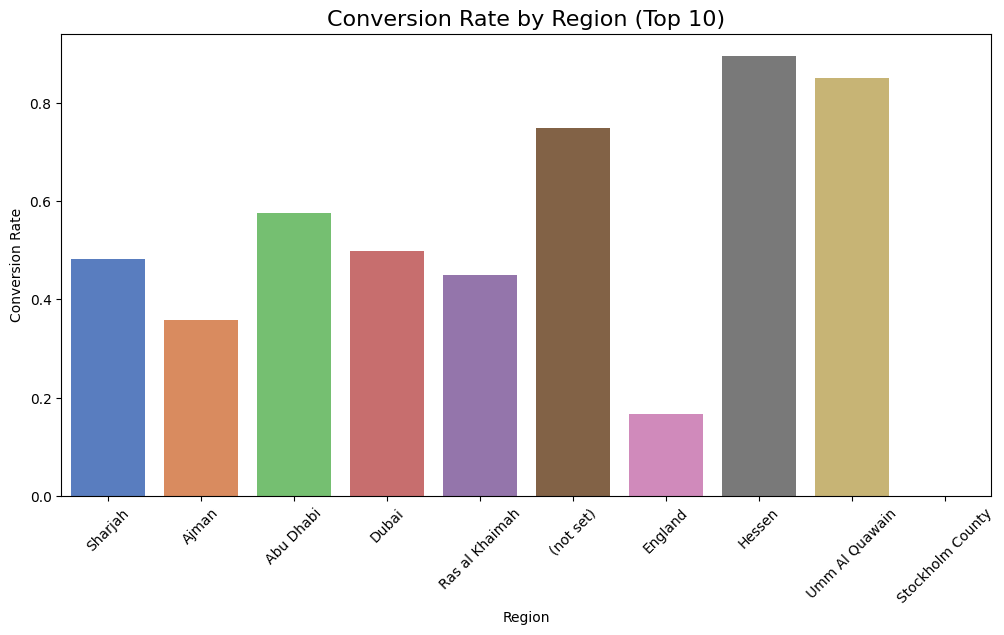

In [51]:
# Plot 3: Conversion rate by region
plt.figure(figsize=(12, 6))
top_regions = data['geoNetwork_region'].value_counts().nlargest(10).index
sns.barplot(data=data[data['geoNetwork_region'].isin(top_regions)], 
            x='geoNetwork_region', y='has_converted', ci=None, palette='muted')
plt.title('Conversion Rate by Region (Top 10)', fontsize=16)
plt.ylabel('Conversion Rate')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

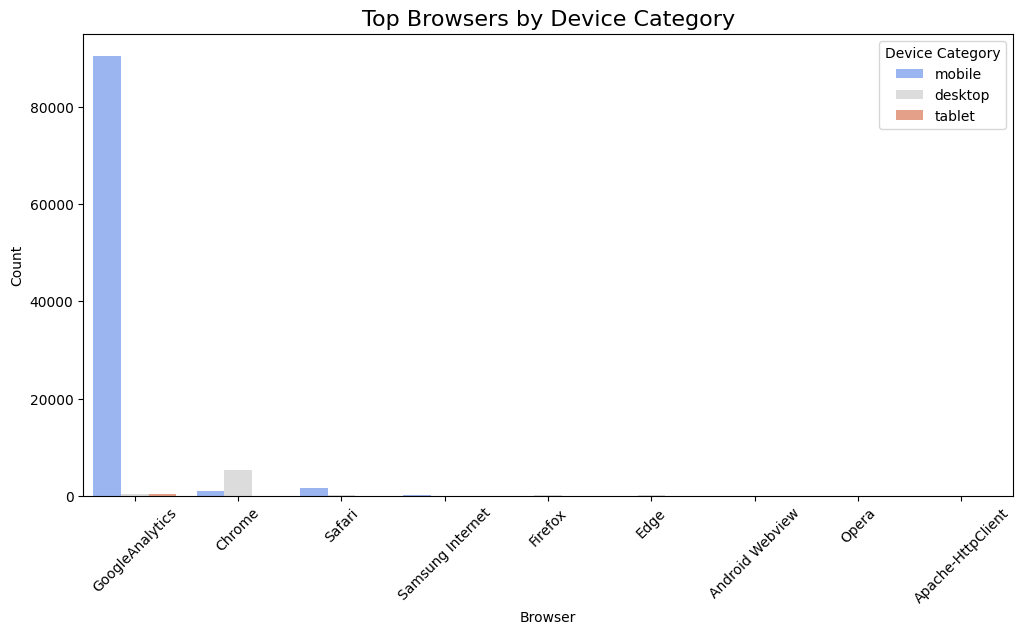

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='device_browser', hue='device_deviceCategory', 
              palette='coolwarm', order=data['device_browser'].value_counts().index[:10])
plt.title('Top Browsers by Device Category', fontsize=16)
plt.ylabel('Count')
plt.xlabel('Browser')
plt.xticks(rotation=45)
plt.legend(title='Device Category')
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_3604\4151201022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_series.index, y=product_series.values, palette='muted')


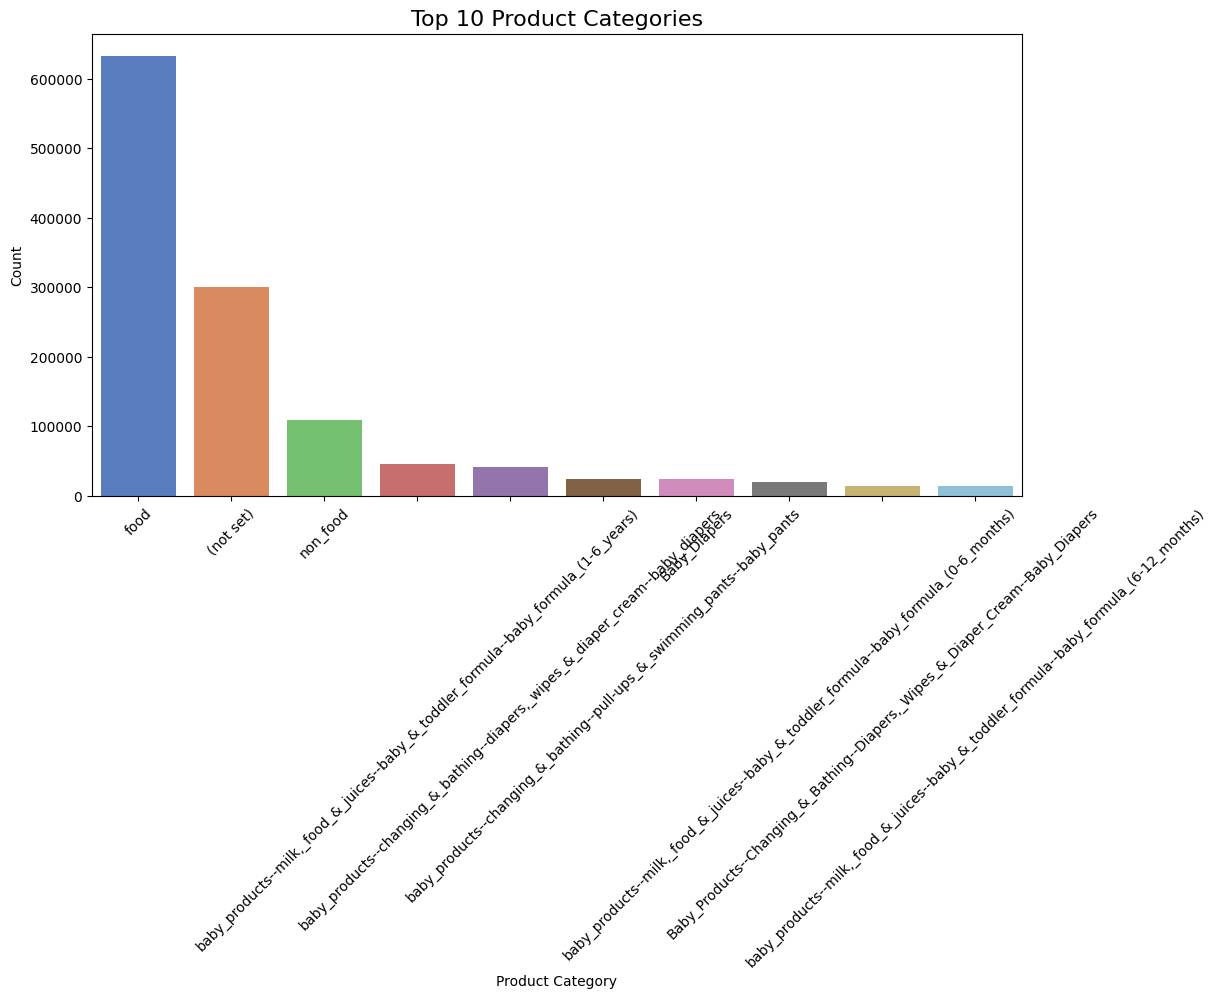

In [54]:
plt.figure(figsize=(12, 6))
product_series = data['products_array'].str.split('////', expand=True).stack().value_counts().nlargest(10)
sns.barplot(x=product_series.index, y=product_series.values, palette='muted')
plt.title('Top 10 Product Categories', fontsize=16)
plt.ylabel('Count')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

TASK 5

- Develop a Python script to integrate with an external API and fetch data based on user input. 

- USING GOOGLE API KEY 
-  MODEL VERSION gemini-1.5-flash
 - i use seperate file and show in streamlit result